<h1> Extracting Crypto Data from API

In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '17cfc2d4-c0ad-40bc-8626-b7d8b7021ec3',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2022-10-19T18:34:24.458Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9424}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9784, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [9]:
type(data)

dict

In [10]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import pandas as pd

pd.set_option('display.max_columns', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9784,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.918382e+07,1.918382e+07,NaN,1,NaN,NaN,None,2022-10-19T18:33:00.000Z,19201.186763,2.542502e+10,-9.9331,0.172128,-1.018904,0.322358,1.349199,-9.741760,-16.222037,3.683522e+11,39.8610,4.032249e+11,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
1,1027,Ethereum,ETH,ethereum,6141,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-10-19T18:33:00.000Z,1297.043683,9.010643e+09,-7.0230,0.054334,-0.929103,-0.032567,-2.473782,-19.648133,-15.911922,1.587242e+11,17.1763,1.587242e+11,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
2,825,Tether,USDT,tether,40993,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.845256e+10,7.014613e+10,NaN,3,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.000111,3.523737e+10,-3.2117,0.004649,0.002276,0.011618,0.002965,0.002040,0.004359,6.846016e+10,7.4084,7.015391e+10,None,2022-10-19T18:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-19 18:40:43.494358
3,3408,USD Coin,USDC,usd-coin,6554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.439532e+10,4.439532e+10,NaN,4,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.000025,2.700291e+09,-2.7266,0.004523,-0.001884,-0.002614,0.004638,0.007596,-0.000244,4.439645e+10,4.8043,4.439645e+10,None,2022-10-19T18:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-19 18:40:43.494358
4,1839,BNB,BNB,bnb,1127,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.610016e+08,1.610016e+08,NaN,5,NaN,NaN,None,2022-10-19T18:33:00.000Z,273.081388,5.109148e+08,-13.1306,0.108564,0.096240,0.817444,2.837351,-3.531680,4.353621,4.396653e+10,4.7578,5.461628e+10,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.988702e+10,9.998926e+10,NaN,6,NaN,NaN,None,2022-10-19T18:33:00.000Z,0.458905,1.361304e+09,1.8409,0.217198,-2.307708,-6.320230,22.893997,35.566267,26.999250,2.289339e+10,2.4775,4.589048e+10,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
6,4687,Binance USD,BUSD,binance-usd,5308,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.162810e+10,2.162810e+10,NaN,7,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.000048,6.394899e+09,-4.2615,-0.043800,0.015336,-0.043294,-0.046895,-0.023393,0.000932,2.162913e+10,2.3406,2.162913e+10,None,2022-10-19T18:33:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-10-19 18:40:43.494358
7,2010,Cardano,ADA,cardano,582,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.429201e+10,3.504502e+10,NaN,8,NaN,NaN,None,2022-10-19T18:33:00.000Z,0.357752,4.367942e+08,9.0652,0.180896,-2.218354,-7.831292,-19.930501,-20.565390,-27.101012,1.226803e+10,1.3275,1.609883e+10,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
8,5426,Solana,SOL,solana,391,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.581139e+08,5.116169e+08,NaN,9,NaN,NaN,None,202

<h1> Creating Automation Script to Regularly Extract Data from API into a CSV

In [12]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '17cfc2d4-c0ad-40bc-8626-b7d8b7021ec3',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\Haroon\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv',mode='a',header=False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-10-19T18:33:21.221Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 9424}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9784, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

In [13]:
df_csv = pd.read_csv(r'C:\Users\Haroon\Documents\Python Scripts\API.csv')
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9779,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.918198e+07,1.918198e+07,NaN,1,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,19519.796914,2.844578e+10,70.8743,-0.065602,1.090683,1.417984,-2.403291,-16.573433,-16.995389,3.744283e+11,40.0935,4.099157e+11,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
1,1,1027,Ethereum,ETH,ethereum,6140,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1329.139079,9.884865e+09,41.0403,0.148063,1.417233,1.663244,-8.567107,-29.021298,-15.825536,1.626519e+11,17.4122,1.626519e+11,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
2,2,825,Tether,USDT,tether,40896,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.843256e+10,7.014613e+10,NaN,3,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1.000080,3.799355e+10,45.7278,0.000570,-0.005562,0.009514,-0.001370,0.010603,0.004729,6.843805e+10,7.3275,7.015175e+10,NaN,2022-10-17T21:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-17 21:42:51.370081
3,3,3408,USD Coin,USDC,usd-coin,6532,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.487973e+10,4.487973e+10,NaN,4,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,1.000054,3.085722e+09,27.5032,-0.008966,-0.002588,-0.000175,-0.004316,-0.001661,-0.014973,4.488214e+10,4.8056,4.488214e+10,NaN,2022-10-17T21:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-17 21:42:51.370081
4,4,1839,BNB,BNB,bnb,1126,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-10-17T21:35:00.000Z,275.044963,6.077622e+08,9.7932,-0.046921,0.667556,-0.049195,-1.177018,-9.545495,1.127983,4.437500e+10,4.7510,5.500899e+10,NaN,2022-10-17T21:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-17 21:42:51.370081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,10,3890,Polygon,MATIC,polygon,501,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,11,NaN,NaN,NaN,2022-10-19T18:31:00.000Z,0.871207,4.452599e+08,-9.8331,0.344656,2.394804,10.571354,15.590306,11.166032,-3.465427,7.609400e+09,0.8234,8.712072e+09,NaN,2022-10-19T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:39:35.431083
386,11,6636,Polkadot,DOT,polkadot-new,420,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1.127979e+09,1.243602e+09,NaN,12,9.048698e+08,5.619530e+09,NaN,2022-10-19T18:31:00.000Z,6.210320,1.914743e+08,1.6575,0.226767,1.026497,0.704917,-1.366692,-15.065089,-16.636441,7.005109e+09,0.7581,7.723168e+09,NaN,2022-10-19T18:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:39:35.431083
387,12,4943,Dai,DAI,multi-collateral-dai,1437,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,6.335435e+09,6.335435e+09,NaN,13,NaN,NaN,NaN,2022-10-19T18:31:00.000Z,0.999934,2.134523e+08,-3.3166,0.002517,0.006195,0.000653,0.035981,0.091606,0.005980,6.335017e+09,0.6857,6.335017e+09,NaN,2022-10-19T18:31:00.000Z,1027.0,Ether

<h1> Transforming and Cleaning the Data

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9784,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19183825.00000,19183825.00000,NaN,1,NaN,NaN,None,2022-10-19T18:33:00.000Z,19201.18676,25425017511.97145,-9.93310,0.17213,-1.01890,0.32236,1.34920,-9.74176,-16.22204,368352206662.28943,39.86100,403224922032.39001,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
1,1027,Ethereum,ETH,ethereum,6141,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-10-19T18:33:00.000Z,1297.04368,9010643093.77859,-7.02300,0.05433,-0.92910,-0.03257,-2.47378,-19.64813,-15.91192,158724246672.25720,17.17630,158724246672.26001,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
2,825,Tether,USDT,tether,40993,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68452559802.34376,70146125803.79472,NaN,3,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.00011,35237373156.40338,-3.21170,0.00465,0.00228,0.01162,0.00296,0.00204,0.00436,68460158474.44311,7.40840,70153912472.56000,None,2022-10-19T18:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-19 18:40:43.494358
3,3408,USD Coin,USDC,usd-coin,6554,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,44395323380.06169,44395323380.06169,NaN,4,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.00003,2700291246.24686,-2.72660,0.00452,-0.00188,-0.00261,0.00464,0.00760,-0.00024,44396452691.26345,4.80430,44396452691.26000,None,2022-10-19T18:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-19 18:40:43.494358
4,1839,BNB,BNB,bnb,1127,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,161001551.36731,161001551.36731,NaN,5,NaN,NaN,None,2022-10-19T18:33:00.000Z,273.08139,510914789.43759,-13.13060,0.10856,0.09624,0.81744,2.83735,-3.53168,4.35362,43966527107.15575,4.75780,54616277587.10000,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,None,2022-10-19T18:33:00.000Z,0.45890,1361303977.66705,1.84090,0.21720,-2.30771,-6.32023,22.89400,35.56627,26.99925,22893393356.40602,2.47750,45890484789.65000,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:40:43.494358
6,4687,Binance USD,BUSD,binance-usd,5308,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,None,2022-10-19T18:33:00.000Z,1.00005,6394899103.67720,-4.26150,-0.04380,0.01534,-0.04329,-0.04690,-0.02339,0.00093,21629130789.61215,2.34060,21629130789.61000,None,2022-10-19T18:33:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-19 18:40:43.494358
7,2010,Cardano,ADA,cardano,582,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34292014820.85600,35045020830.32300,NaN,8,NaN,NaN,None,2022-10-19T18:33:00.000Z,0.35775,436794234.84507,9.06520,0.18090,-2.21835,-7.83129,-19.93050,-20.56539,-27.10101,12268027780.16901,1.32750,16098828050.54000,None,2022-10-19T18:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-19 18:4

In [16]:
df2 = df.groupby('name', sort=False)['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.17213,-1.01890,0.32236,1.34920,-9.74176,-16.22204
Ethereum,0.05433,-0.92910,-0.03257,-2.47378,-19.64813,-15.91192
Tether,0.00465,0.00228,0.01162,0.00296,0.00204,0.00436
USD Coin,0.00452,-0.00188,-0.00261,0.00464,0.00760,-0.00024
BNB,0.10856,0.09624,0.81744,2.83735,-3.53168,4.35362
XRP,0.21720,-2.30771,-6.32023,22.89400,35.56627,26.99925
Binance USD,-0.04380,0.01534,-0.04329,-0.04690,-0.02339,0.00093
Cardano,0.18090,-2.21835,-7.83129,-19.93050,-20.56539,-27.10101
Solana,0.07970,-1.87441,-4.35431,-7.15312,-17.01033,-30.72441


In [17]:
df3 = df2.stack()
df3

name                                   
Bitcoin    quote.USD.percent_change_1h      0.17213
           quote.USD.percent_change_24h    -1.01890
           quote.USD.percent_change_7d      0.32236
           quote.USD.percent_change_30d     1.34920
           quote.USD.percent_change_60d    -9.74176
                                             ...   
Shiba Inu  quote.USD.percent_change_24h    -0.49343
           quote.USD.percent_change_7d     -0.54819
           quote.USD.percent_change_30d    -6.79511
           quote.USD.percent_change_60d   -22.03036
           quote.USD.percent_change_90d   -15.70652
Length: 90, dtype: float64

In [20]:
type(df3)

pandas.core.series.Series

<h1> Renaming the Data

In [22]:
df4 = df3.to_frame(name='values')
df4

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.17213
          quote.USD.percent_change_24h  -1.01890
          quote.USD.percent_change_7d    0.32236
          quote.USD.percent_change_30d   1.34920
          quote.USD.percent_change_60d  -9.74176
...                                          ...
Shiba Inu quote.USD.percent_change_24h  -0.49343
          quote.USD.percent_change_7d   -0.54819
          quote.USD.percent_change_30d  -6.79511
          quote.USD.percent_change_60d -22.03036
          quote.USD.percent_change_90d -15.70652

[90 rows x 1 columns]

In [23]:
df4.count()

values    90
dtype: int64

<h1> Resetting the Index

In [25]:
index = pd.Index(range(90))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.17213
1,Bitcoin,quote.USD.percent_change_24h,-1.01890
2,Bitcoin,quote.USD.percent_change_7d,0.32236
3,Bitcoin,quote.USD.percent_change_30d,1.34920
4,Bitcoin,quote.USD.percent_change_60d,-9.74176
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-0.49343
86,Shiba Inu,quote.USD.percent_change_7d,-0.54819
87,Shiba Inu,quote.USD.percent_change_30d,-6.79511
88,Shiba Inu,quote.USD.percent_change_60d,-22.03036


In [26]:
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.17213
1,Bitcoin,quote.USD.percent_change_24h,-1.01890
2,Bitcoin,quote.USD.percent_change_7d,0.32236
3,Bitcoin,quote.USD.percent_change_30d,1.34920
4,Bitcoin,quote.USD.percent_change_60d,-9.74176
...,...,...,...
85,Shiba Inu,quote.USD.percent_change_24h,-0.49343
86,Shiba Inu,quote.USD.percent_change_7d,-0.54819
87,Shiba Inu,quote.USD.percent_change_30d,-6.79511
88,Shiba Inu,quote.USD.percent_change_60d,-22.03036


<h1> Renaming the Times for Cleaner Representation when Visualized

In [27]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.17213
1,Bitcoin,24h,-1.01890
2,Bitcoin,7d,0.32236
3,Bitcoin,30d,1.34920
4,Bitcoin,60d,-9.74176
...,...,...,...
85,Shiba Inu,24h,-0.49343
86,Shiba Inu,7d,-0.54819
87,Shiba Inu,30d,-6.79511
88,Shiba Inu,60d,-22.03036


<h1> Top 15 Cryptos Over Recent Time

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

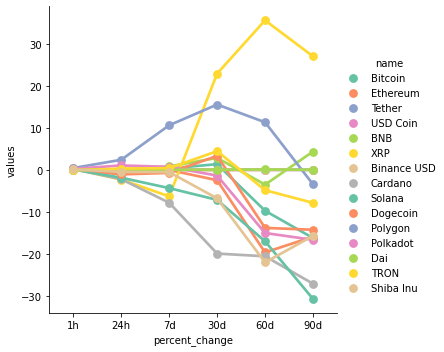

In [29]:
sns.catplot(x='percent_change', y='values', hue='name', palette='Set2', data=df6, kind='point')

<h1> Top 15 Coin Market Dominance

In [45]:
coin_market_cap = df.groupby(['name'])['quote.USD.market_cap_dominance'].sum()
df8 = pd.DataFrame(coin_market_cap)

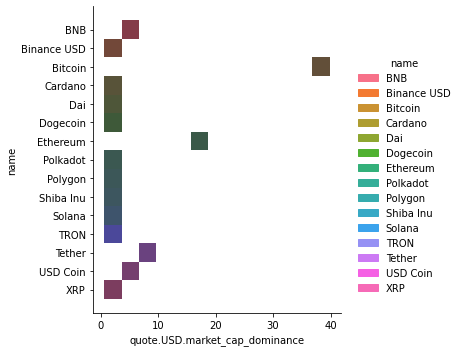

In [49]:
sns.displot(x='quote.USD.market_cap_dominance',y='name', hue='name', data=df8)

<h1>Bitcoin and Ethereum

In [120]:
df9 = df6[df6['name'].str.contains('Bitcoin|Ethereum', na=False)]
df9

,name,percent_change,values
0,Bitcoin,1h,0.17213
1,Bitcoin,24h,-1.01890
2,Bitcoin,7d,0.32236
3,Bitcoin,30d,1.34920
4,Bitcoin,60d,-9.74176
5,Bitcoin,90d,-16.22204
6,Ethereum,1h,0.05433
7,Ethereum,24h,-0.92910
8,Ethereum,7d,-0.03257
9,Ethereum,30d,-2.47378


<AxesSubplot:xlabel='name', ylabel='values'>

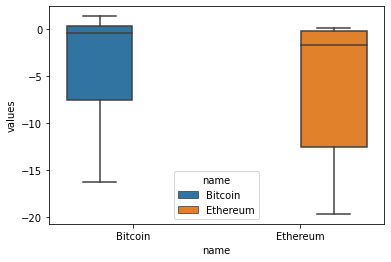

In [135]:
sns.boxplot(x='name',y='values',data=df9,hue='name')